Greetings for: 

- https://www.kaggle.com/vikassingh1996/handling-categorical-variables-encoding-modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

The main goal on this dataset is to predict accurately with categorical data a binary variable. We should encode those features with our best methods and analyze which of them are the best to prediction. We will do a brevely summary of which methods were applied on the competition.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.max_columns',150)

###### Data description:

- On an overview we have patters inside the categorical data. For example, there is some pattern in the frequency offew columns. ¿Which method can we use on those cases? 

- In some columns, we saw cases in which are new categories on the test dataset compare to the same column on the train dataset. 

- We will see the distribution of the target variable

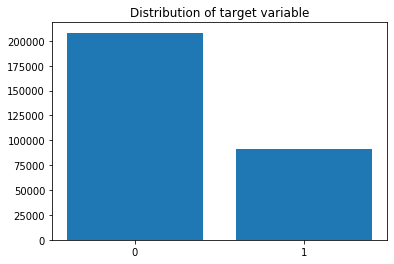

In [3]:
x = train.target.value_counts() #Defining our variables to plot
plt.bar(x.index,x) #Basic bar graph
plt.gca().set_xticks([0,1]) #setting the X axis space
plt.title('Distribution of target variable')
plt.show()

In [4]:
for cat_col in train.columns:
    print(cat_col, 'have',train[cat_col].nunique(),'unique values',train[cat_col].value_counts().to_dict())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



nom_2 have 6 unique values {'Lion': 101295, 'Cat': 49659, 'Snake': 45979, 'Dog': 37444, 'Axolotl': 36136, 'Hamster': 29487}
nom_3 have 6 unique values {'Russia': 101123, 'Canada': 49951, 'China': 46044, 'Finland': 36942, 'Costa Rica': 35988, 'India': 29952}
nom_4 have 4 unique values {'Oboe': 92293, 'Piano': 84517, 'Bassoon': 68448, 'Theremin': 54742}
nom_5 have 222 unique values {'f7821e391': 2801, '06eeaf0aa': 2750, '472efea17': 2729, '20b10a832': 2725, 'b97f51ac4': 2717, '475e79160': 2714, '778fdbe56': 2692, '416a8f3ab': 2683, '6c90f81cd': 2674, '5a466e166': 2673, '640e1fdd5': 2670, '72f8028dc': 2663, 'e9f44a509': 2653, '4845cc770': 2650, '4e28ceffa': 2643, '46cab09da': 2639, '83b38aa6b': 2630, '2ff007c26': 2630, 'de04b8750': 2613, 'eb69430d6': 2603, '5a94fc1d9': 2597, '50f116bcf': 2594, '908a1b9c9': 2579, 'bd40c81f3': 2577, '66669a44f': 2554, '9ad6558d1': 2545, '0b3bec656': 2535, '3263bdce5': 2524, '30a15b6bd': 2477, '3685a0904': 2457, 'e70a6270d': 2449, '91bde92fa': 2433, '115a252

nom_7 have 1220 unique values {'3a114adea': 534, '3b679e531': 518, '6f3940b72': 518, 'fcf2b8dce': 517, 'fe27cc23d': 515, 'c6344321c': 510, 'c75a7f5f8': 508, 'a0be4f3da': 505, 'c6dfa929a': 501, 'eeba65bef': 500, 'bb5a78030': 500, 'cab0b4ca9': 499, '4a0ff1117': 498, 'a2507f97d': 497, '7c6d738f8': 496, '700924d38': 496, 'eb50b1f32': 496, '17d7c7e77': 494, '5aed00b2c': 493, 'a88395028': 492, '2d8e816e2': 490, '12e6161c9': 490, '0378e418b': 490, '944df579c': 489, '077a10d72': 487, '5fee1e1d2': 487, '346c81c8f': 486, '4addee130': 486, 'd863df6ca': 486, '0e0637b46': 485, '3c452e60d': 485, '59de9c26a': 484, 'f6ddab67f': 483, '3f0057c9b': 482, '22831fffe': 481, '4a79709cd': 481, 'be90beeea': 480, '00994f749': 480, '3e5f076e2': 479, 'f037a1bfd': 478, '85495b390': 476, 'b042166d5': 476, 'd640f9971': 475, 'a6a36f527': 475, 'f53ce6da5': 475, 'e94478990': 474, '66418d6ec': 472, '058d689da': 472, 'f16ff4894': 471, '386eb705f': 471, '0c1cfb224': 470, '4a7761d5f': 470, 'ba636104c': 470, '4d6f50082': 47

ord_1 have 5 unique values {'Novice': 126583, 'Grandmaster': 77428, 'Contributor': 42871, 'Master': 28053, 'Expert': 25065}
ord_2 have 6 unique values {'Freezing': 99816, 'Lava Hot': 63908, 'Boiling Hot': 60627, 'Cold': 33768, 'Hot': 22227, 'Warm': 19654}
ord_3 have 15 unique values {'g': 36405, 'l': 36124, 'a': 35276, 'k': 28619, 'i': 28048, 'h': 24740, 'j': 24647, 'f': 22384, 'e': 21331, 'b': 11916, 'o': 11320, 'd': 7904, 'c': 6944, 'n': 4014, 'm': 328}
ord_4 have 26 unique values {'L': 19066, 'G': 18899, 'S': 18875, 'A': 18258, 'R': 16927, 'Q': 15925, 'K': 14698, 'I': 14644, 'Z': 14232, 'T': 14220, 'V': 14143, 'J': 12878, 'P': 12839, 'U': 12775, 'H': 12743, 'F': 11717, 'E': 11303, 'W': 9197, 'Y': 8490, 'X': 6292, 'B': 6169, 'O': 5836, 'D': 3974, 'C': 3575, 'N': 2166, 'M': 159}
ord_5 have 192 unique values {'od': 5019, 'fO': 3435, 'Zq': 2926, 'sD': 2880, 'qP': 2854, 'Xi': 2840, 'Gb': 2824, 'TZ': 2798, 'Bd': 2771, 'on': 2764, 'ac': 2758, 'uS': 2757, 'ek': 2740, 'CZ': 2735, 'Eg': 2700,

#### We should focus on curious things like nom_9 frecuency of their cats.

- Can we group by some intervals of frecuency? 

In [5]:
train.nom_0.value_counts()

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64

### Explaining new methods:

- Feature Hasher: **implemented as an experiment**

In [6]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(input_type='string')
hola_h = h.transform(train[['nom_0','nom_2']].values)
hola_h

<300000x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 600000 stored elements in Compressed Sparse Row format>

- Encoding cyclic features: It implements to cyclic types of data as days, months, periods, etc. A common method is to transform data in two dimensions using sine and cosine transformations.

In this data we should see that month & day columns are integer type. So if we can transformate into sine and cosine form we only have to multiply those numbers with 2pi and **divide** this number with the max value of each column (with the purpose to obtain certain range between 0 and 2pi)

It should be two columns generated of this method, one with sine and other with cosine transformation...

In [7]:
X_train_cyclic=train.copy()

columns=['day','month']

for col in columns:
    train[col+'_sin'] = np.sin((2*np.pi*train[col])/max(train[col]))
    train[col+'_cos'] = np.cos((2*np.pi*train[col])/max(train[col]))
    test[col+'_sin'] = np.sin((2*np.pi*test[col])/max(test[col]))
    test[col+'_cos'] = np.cos((2*np.pi*test[col])/max(test[col]))

#### We can divide the categorical values on three types: 
- Binomial
- Low Cardinality variables
- High Cardinality variables

In [8]:
binomial = [col for col in train.columns if (train[col].nunique() == 2) & (col != 'target')]
low_cardinality = [col for col in train.columns if (train[col].nunique() < 100) & (train[col].nunique()>2)]
high_cardinality = [col for col in train.columns if (train[col].nunique() > 100)]

In [9]:
train['bin_3']=train.bin_3.map({'T':1,'F':0}).astype('int32')
test['bin_3'] = test.bin_3.map({'T':1,'F':0}).astype('int32')

train['bin_4']=train.bin_4.map({'Y':1,'N':0}).astype('int32')
test['bin_4']=test.bin_4.map({'Y':1,'N':0}).astype('int32')

In [10]:
high_cardinality

['id', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_5']

In [11]:
train.ord_5.unique()

array(['kr', 'bF', 'Jc', 'kW', 'qP', 'PZ', 'wy', 'Ed', 'qo', 'CZ', 'qX',
       'su', 'dP', 'aP', 'MV', 'oC', 'RL', 'fh', 'gJ', 'Hj', 'TR', 'CL',
       'Sc', 'eQ', 'kC', 'qK', 'dh', 'gM', 'Jf', 'fO', 'Eg', 'KZ', 'Vx',
       'Fo', 'sV', 'eb', 'YC', 'RG', 'Ye', 'qA', 'lL', 'Qh', 'Bd', 'be',
       'hT', 'lF', 'nX', 'kK', 'av', 'uS', 'Jt', 'PA', 'Er', 'Qb', 'od',
       'ut', 'Dx', 'Xi', 'on', 'Dc', 'sD', 'rZ', 'Uu', 'sn', 'yc', 'Gb',
       'Kq', 'dQ', 'hp', 'kL', 'je', 'CU', 'Fd', 'PQ', 'Bn', 'ex', 'hh',
       'ac', 'rp', 'dE', 'oG', 'oK', 'cp', 'mm', 'vK', 'ek', 'dO', 'XI',
       'CM', 'Vf', 'aO', 'qv', 'jp', 'Zq', 'Qo', 'DN', 'TZ', 'ke', 'cG',
       'tP', 'ud', 'tv', 'aM', 'xy', 'lx', 'To', 'uy', 'ZS', 'vy', 'ZR',
       'AP', 'GJ', 'Wv', 'ri', 'qw', 'Xh', 'FI', 'nh', 'KR', 'dB', 'BE',
       'Bb', 'mc', 'MC', 'tM', 'NV', 'ih', 'IK', 'Ob', 'RP', 'dN', 'us',
       'dZ', 'yN', 'Nf', 'QM', 'jV', 'sY', 'wu', 'SB', 'UO', 'Mx', 'JX',
       'Ry', 'Uk', 'uJ', 'LE', 'ps', 'kE', 'MO', 'k

#### Useful insights from Kaggle:

- In this dataset, One Hot Encoding have better performance than Label Encoding. So Catboost should be perform better than lgbm (because the algorithm use one hot encoder inside)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in low_cardinality:
    le.fit(list(train[col].values)+list(test[col].values))
    train[col]=le.transform(train[col])
    test[col] =le.transform(test[col])

#### Using Ordinal encoder for ord_5

In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories='auto')
oe.fit(train.ord_5.values.reshape(-1,1))
train['ord_5'] = oe.fit_transform(train.ord_5.values.reshape(-1,1))
test['ord_5'] = oe.fit_transform(test.ord_5.values.reshape(-1,1))

In [14]:
for col in high_cardinality:
    enc_norm_1 = (train.groupby(col).size())/len(train)
    train[f'freq_{col}'] = train[col].apply(lambda x: enc_norm_1[x])
    enc_norm_2 = (test.groupby(col).size())/len(test)
    test[f'freq_{col}'] = test[col].apply(lambda x: enc_norm_2[x])

In [15]:
for df in [train, test]:
    df.drop(['nom_5','nom_6','nom_7','nom_8','nom_9'],axis=1,inplace=True)

In [16]:
train.head()

id  bin_0  bin_1  bin_2  bin_3  bin_4  nom_0  nom_1  nom_2  nom_3  nom_4  \
0   0      0      0      0      1      1      1      5      5      3      0   
1   1      0      1      0      1      1      1      4      3      5      2   
2   2      0      0      0      0      1      0      4      4      5      3   
3   3      0      1      0      0      1      2      4      5      0      1   
4   4      0      0      0      0      0      2      4      4      0      1   

   ord_0  ord_1  ord_2  ord_3  ord_4  ord_5  day  month  target  day_sin  \
0      1      2      1      7      3  136.0    1      1       0        6   
1      0      2      3      0      0   93.0    6      7       0        3   
2      0      1      4      7     17   31.0    6      1       0        3   
3      0      2      0      8      3  134.0    1      0       1        6   
4      0      2      2      0     17  158.0    6      7       0        3   

   day_cos  month_sin  month_cos   freq_id  freq_nom_5  freq_nom_6  \
0        3          8          7  0.000003    0.008647    0.003827   
1        6          2          3  0.000003    0.002640    0.002807   
2        6          8          7  0.000003    0.008413    0.003897   
3        3          7          9  0.000003    0.003250    0.003917   
4        6          2          3  0.000003    0.006700    0.003857   

   freq_nom_7  freq_nom_8  freq_nom_9  freq_ord_5  
0    0.000803    0.000903    0.000063    0.001687  
1    0.000957    0.000370    0.000043    0.008677  
2    0.001583    0.000927    0.000097    0.008573  
3    0.001473    0.000677    0.000147    0.008633  
4    0.001453    0.000690    0.000117    0.009513

#### For testing purposes:

In [17]:
#from sklearn.model_selection import train_test_split
#X = train.drop('target',axis=1)
#y = train.target

#X_train,X_test,y_train,y_test = train_test_split(X,y)

In [18]:
#We have a slightly imbalace data
train.target.value_counts()

0    208236
1     91764
Name: target, dtype: int64

In [19]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
        #    df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [20]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 58.36 MB
Memory usage after optimization is: 12.02 MB
Decreased by 79.4%


In [21]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [22]:
X = train.drop('target',axis=1)
y = train.target
X_summit = test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Basic Catboost prediction

In [24]:
cat_feats = np.where(test.dtypes != np.float)[0]

In [25]:
cat_params = {'loss_function': 'CrossEntropy', 'eval_metric': "AUC",'learning_rate': 0.01, 'iterations': 10000,
             'random_seed': 42,'od_type': "Iter",'early_stopping_rounds': 500}

In [26]:
from catboost import CatBoostClassifier, Pool
#Pool is used as data structure to train models from

train_ = Pool(X_train,label=y_train,cat_features=cat_feats)
test_ = Pool(X_test, label=y_test, cat_features=cat_feats)

model = CatBoostClassifier(**cat_params)

fit_model = model.fit(train_, eval_set=test_, use_best_model=True,verbose=1000,plot=True)

feature_importance = fit_model.feature_importances_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6788804	best: 0.6788804 (0)	total: 1.17s	remaining: 3h 15m 34s
1000:	test: 0.7657045	best: 0.7657045 (1000)	total: 14m 9s	remaining: 2h 7m 15s
2000:	test: 0.7695004	best: 0.7695004 (2000)	total: 29m 2s	remaining: 1h 56m 6s
3000:	test: 0.7715622	best: 0.7715622 (3000)	total: 44m 31s	remaining: 1h 43m 51s
4000:	test: 0.7727850	best: 0.7727851 (3999)	total: 1h 22s	remaining: 1h 30m 31s
5000:	test: 0.7736065	best: 0.7736087 (4998)	total: 1h 16m 39s	remaining: 1h 16m 37s
6000:	test: 0.7742186	best: 0.7742192 (5999)	total: 1h 33m 3s	remaining: 1h 2m
7000:	test: 0.7746496	best: 0.7746509 (6999)	total: 1h 50m 22s	remaining: 47m 16s
8000:	test: 0.7749634	best: 0.7749643 (7997)	total: 2h 7m 10s	remaining: 31m 46s
9000:	test: 0.7752805	best: 0.7752805 (9000)	total: 2h 24m 28s	remaining: 16m 2s
9999:	test: 0.7754976	best: 0.7754992 (9996)	total: 2h 42m 6s	remaining: 0us

bestTest = 0.7754992278
bestIteration = 9996

Shrink model to first 9997 iterations.


In [46]:
model_best = model.best_iteration_

In [66]:
predictions = model.predict_proba(X_summit)
predictions[:,1]

array([0.31171267, 0.54635063, 0.19751899, ..., 0.11772987, 0.47718954,
       0.20582422])

In [72]:
predictions[:,1].tolist()

[0.3117126717746894,
 0.5463506268573378,
 0.19751898751966343,
 0.4140757788966266,
 0.8354619393066369,
 0.4578036417075391,
 0.43860487249621494,
 0.08303973504546962,
 0.4791442778544187,
 0.4324696738115072,
 0.35360146351758004,
 0.3360455208120701,
 0.3389892583937474,
 0.5456288086611982,
 0.24286363001031502,
 0.4054670935600017,
 0.13914207035043624,
 0.6631673502451781,
 0.48072095266767967,
 0.6680023854512456,
 0.2834761981239188,
 0.4722219067968426,
 0.0562700752128584,
 0.0336388263395352,
 0.2327538983368917,
 0.03880170662248997,
 0.08070135874913195,
 0.07211533190605018,
 0.174621625230742,
 0.4858562509390653,
 0.18776168157915626,
 0.38681423688188715,
 0.15488664135158806,
 0.24464329963400377,
 0.13002145159433615,
 0.31309941711989037,
 0.2393209606867627,
 0.15889729876273062,
 0.3592169858939711,
 0.643458870426567,
 0.1448418023319165,
 0.11009822071677261,
 0.07589835228459356,
 0.2528284508501588,
 0.44867889004324124,
 0.3404061783387926,
 0.1114345035486

In [74]:
subm = pd.read_csv('sample_submission.csv')
subm['target'] = predictions[:,1].tolist()

In [75]:
subm.to_csv('second_submission.csv',index=False)

In [43]:
1 - subm['target']

0         0.311713
1         0.546351
2         0.197519
3         0.414076
4         0.835462
            ...   
199995    0.223943
199996    0.130624
199997    0.117730
199998    0.477190
199999    0.205824
Name: target, Length: 200000, dtype: float64

## Catboost Baseline (with StratifiedFolds)

In [ ]:

from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

target='target'
features = [*train.columns] 
features.remove('target')

In [70]:
features_index = [features.index(feat) for feat in train.columns if feat in features]
features_index.remove(18)

In [56]:
for fold_, (train_index, test_index) in enumerate(folds.split(train.drop('target',axis=1),train['target'])):
    print(fold_, 'have shape', train.iloc[train_index,features_index].shape, 'and', train.loc[train_index,'target'].value_counts())

0 have shape (239999, 29) and 0    166588
1     73411
Name: target, dtype: int64
1 have shape (240000, 29) and 0    166589
1     73411
Name: target, dtype: int64
2 have shape (240000, 29) and 0    166589
1     73411
Name: target, dtype: int64
3 have shape (240000, 29) and 0    166589
1     73411
Name: target, dtype: int64
4 have shape (240001, 29) and 0    166589
1     73412
Name: target, dtype: int64


In [86]:
prm = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'early_stopping_rounds': 200,
          'cat_features': features_index,
          #'task_type': 'GPU',
          'random_seed': 17,
          'learning_rate':0.01,
       #'logging_level': 'Silent'
         }
model = CatBoostClassifier(prm)

In [82]:
print(*train.iloc[test_index,features_index].columns)
print(*test.iloc[:].columns)

bin_1 bin_2 bin_3 bin_4 nom_0 nom_1 nom_2 nom_3 nom_4 ord_0 ord_1 ord_2 ord_3 ord_4 ord_5 day month day_sin day_cos month_sin month_cos freq_id freq_nom_5 freq_nom_6 freq_nom_7 freq_nom_8 freq_nom_9 freq_ord_5
bin_1 bin_2 bin_3 bin_4 nom_0 nom_1 nom_2 nom_3 nom_4 ord_0 ord_1 ord_2 ord_3 ord_4 ord_5 day month day_sin day_cos month_sin month_cos freq_id freq_nom_5 freq_nom_6 freq_nom_7 freq_nom_8 freq_nom_9 freq_ord_5


In [81]:
test.drop('bin_0',axis=1,inplace=True)

In [87]:
for fold_, (train_index, test_index) in enumerate(folds.split(train.drop('target',axis=1),train['target'])):
    ctb = model.fit(train.iloc[train_index,features_index],train.loc[train_index,'target'], 
                    eval_set=(train.iloc[test_index,features_index],train.loc[test_index,'target']))
    
    test["target_fold"+str(fold_)] = ctb.predict(test)
    print(fold_,'listo')

CatboostError: c:/goagent/pipelines/buildmaster/catboost.git/catboost/libs/options/json_helper.h:152: Can't parse parameter "iterations" with value: {"cat_features":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29],"early_stopping_rounds":200,"eval_metric":"AUC","random_seed":17,"learning_rate":0.01,"verbose":200,"loss_function":"Logloss"}

In [83]:
help(CatBoostClassifier)

Help on class CatBoostClassifier in module catboost.core:

class CatBoostClassifier(CatBoost)
 |  CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function='Logloss', border_count=None, feature_border_type=None, fold_permutation_block_size=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, classes_count=None, class_weights=None, class_names=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None, custom_loss=None, custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None, snapshot_fi